# **Case-1**

In [0]:


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(25, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(35, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.2569 - acc: 0.9211 - val_loss: 0.0559 - val_acc: 0.9828
Epoch 2/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0908 - acc: 0.9727 - val_loss: 0.0396 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0702 - acc: 0.9785 - val_loss: 0.0406 - val_acc: 0.9861
Epoch 4/12
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0573 - acc: 0.9829 - val_loss: 0.0341 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0499 - acc: 0.9855 - val_loss: 0.0328 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0454 - acc: 0.9868 - val_loss: 0.0290 - 

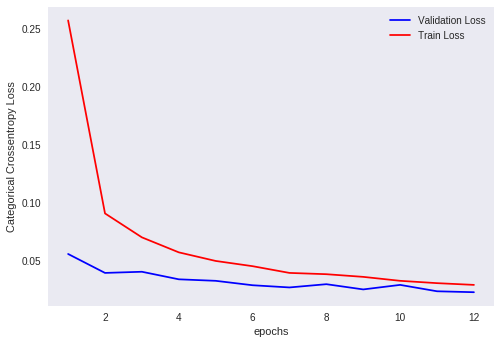

In [0]:
TrainLoss=[0.2569,0.0908 ,0.0702,0.0573,0.0499,0.0454 ,0.0396,0.0385,0.0362,0.0328,0.0308,0.0293]
ValidationLoss=[0.0559 ,0.0396,0.0406,0.0341,0.0328,0.0290,0.0271,0.0299,0.0254 ,0.0293,0.0238,0.0230]
epochs=[1,2,3,4,5,6,7,8,9,10,11,12]
import matplotlib.pyplot as plt
import numpy as np
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')
ty= TrainLoss
vy= ValidationLoss
x=epochs
plt_dynamic(x, vy, ty, ax)

# **Case-2**

In [0]:


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 148s 2ms/step - loss: 0.2339 - acc: 0.9331 - val_loss: 0.0520 - val_acc: 0.9843
Epoch 2/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0837 - acc: 0.9759 - val_loss: 0.0414 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0648 - acc: 0.9812 - val_loss: 0.0330 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0543 - acc: 0.9838 - val_loss: 0.0300 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0474 - acc: 0.9854 - val_loss: 0.0374 - val_acc: 0.9875
Epoch 6/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0428 - acc: 0.9874 - val_loss: 0.0263 - val_acc: 0.9911
Epoch 7/12
60000/60000 [=========================

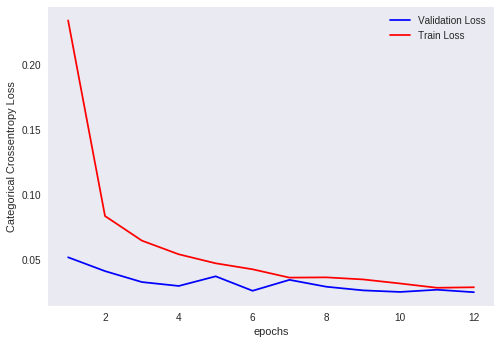

In [0]:
TrainLoss=[0.2339,0.0837 ,0.0648,0.0543,0.0474,0.0428 ,0.0364,0.0366,0.0350,0.0319,0.0286,0.0290]
ValidationLoss=[0.052 ,0.0414,0.0330,0.03,0.0374,0.0263,0.0347,0.0294,0.0266 ,0.0254,0.0271,0.0252]
epochs=[1,2,3,4,5,6,7,8,9,10,11,12]
import matplotlib.pyplot as plt
import numpy as np
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')
ty= TrainLoss
vy= ValidationLoss
x=epochs
plt_dynamic(x, vy, ty, ax)

# Case-3


In [0]:


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 362s 6ms/step - loss: 0.1003 - acc: 0.9706 - val_loss: 0.0445 - val_acc: 0.9872
Epoch 2/12
60000/60000 [==============================] - 361s 6ms/step - loss: 0.0309 - acc: 0.9912 - val_loss: 0.0434 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 360s 6ms/step - loss: 0.0159 - acc: 0.9955 - val_loss: 0.0359 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 361s 6ms/step - loss: 0.0095 - acc: 0.9974 - val_loss: 0.0391 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 359s 6ms/step - loss: 0.0065 - acc: 0.9982 - val_loss: 0.0355 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 357s 6ms/step - loss: 0.0065 - acc: 0.9982 - val_loss: 0.0408 - val_acc: 0.9875
Epoch 7/12
60000/60000 [=========================

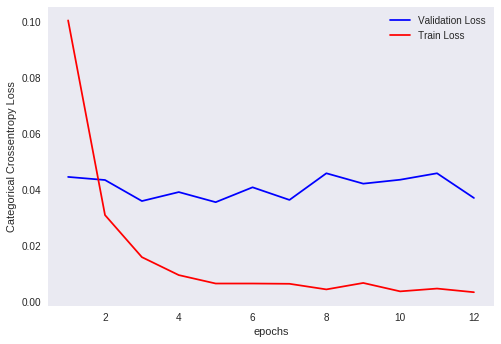

In [0]:
TrainLoss=[0.1003,0.03090 ,0.0159,0.0095,0.0065,0.0065 ,0.0064,0.0044,0.0067,0.0037,0.0047,0.0034]
ValidationLoss=[0.0445,0.0434,0.0359,0.0391,0.0355,0.0408,0.0363,0.0458,0.0421 ,0.0435,0.0458,0.0370]
epochs=[1,2,3,4,5,6,7,8,9,10,11,12]
import matplotlib.pyplot as plt
import numpy as np
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')
ty= TrainLoss
vy= ValidationLoss
x=epochs
plt_dynamic(x, vy, ty, ax)

# Summary:

In [0]:
!pip install tabulate
from tabulate import tabulate
print (tabulate([["Case-1",'5*5 and 3*3','1','Yes','No', 'Adagrad', '99.21'],["Case-2",'4*4 and 2*2','2','Yes', 'Yes', 'Adagrad', '99.23'],["Case-3",'3*3 and 2*2','1','No', 'Yes', 'Adam', '99.05']],headers=['CASE','CNN SIZE','NO.OF MAX POOL','DROPOUT','BATCH NORMALIZATION','OPTIMIZER','ACCURACY'] ))

CASE    CNN SIZE       NO.OF MAX POOL  DROPOUT    BATCH NORMALIZATION    OPTIMIZER      ACCURACY
------  -----------  ----------------  ---------  ---------------------  -----------  ----------
Case-1  5*5 and 3*3                 1  Yes        No                     Adagrad           99.21
Case-2  4*4 and 2*2                 2  Yes        Yes                    Adagrad           99.23
Case-3  3*3 and 2*2                 1  No         Yes                    Adam              99.05


# Comments:
**1) The computational time was significantly higher in Case-3 compared to other two cases as I didn't use Dropout technique**

** 2) Dropout technique is very crucial when you are dealing with large data sets and operations **

**3) Even though we used small sized CNN filters in Case-2 , the accuracy is silmilar to Case-1(which used larger CNN filters) due to Batch Normalization technique**

**4) More number of computations doesn't guarantee us higher accuracy( Like Case-3) **
